## Exploratory Data Analysis

In [263]:
#import packages
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [264]:
#data location
column_definition_path="./Data/column_definitions.xlsx"
airline_data_path="./Data/DS_airline_delay_causes.csv"

#import data to dataframes
flight_data_df=pd.read_csv(airline_data_path)
column_definition_df=pd.read_excel(column_definition_path)

In [265]:
#displaying first five rows
print("Displaying first five rows of Flight data")
flight_data_df.head()

Displaying first five rows of Flight data


,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,Unnamed: 21
0,2009,11,AS,Alaska Airlines Inc.,DCA,"Washington, DC: Ronald Reagan Washington National",88.0,11.0,1.99,0.00,...,0.00,0.0,0.0,266.0,65.0,0.0,201.0,0.0,0.0,NaN
1,2009,11,AS,Alaska Airlines Inc.,DEN,"Denver, CO: Denver International",123.0,5.0,3.47,0.00,...,0.00,0.0,0.0,81.0,57.0,0.0,24.0,0.0,0.0,NaN
2,2009,11,AS,Alaska Airlines Inc.,DFW,"Dallas/Fort Worth, TX: Dallas/Fort Worth Inter...",66.0,6.0,1.28,0.69,...,0.00,0.0,0.0,176.0,64.0,11.0,101.0,0.0,0.0,NaN
3,2009,11,AS,Alaska Airlines Inc.,EWR,"Newark, NJ: Newark Liberty International",59.0,10.0,0.24,0.00,...,0.56,0.0,0.0,553.0,8.0,0.0,526.0,0.0,19.0,NaN
4,2009,11,AS,Alaska Airlines Inc.,HNL,"Honolulu, HI: Daniel K Inouye International",85.0,18.0,1.34,1.46,...,0.00,0.0,0.0,547.0,85.0,89.0,373.0,0.0,0.0,NaN


In [266]:
print("Displaying first five rows of Column Definitions data")
column_definition_df.head()

Displaying first five rows of Column Definitions data


,Column,Description
0,year,Year
1,month,Month
2,carrier,Two character designator for the carrier
3,carrier_name,Full carrier name
4,airport,IATA airport code


So, based on the visualising the first 5 columnns of both the dataframes, we can observe that one dataframe contains the flight data and the other contains the column definitions. So, for more exploration we just consider the dataframe containing flight data.


In [267]:
#getting basic info of the flight data 
flight_data_df.info()

#getting count of number of features and number of data samples
Original_features=flight_data_df.shape[1]
Original_Columns= flight_data_df.shape[0]
print(f"Number of Features:{flight_data_df.shape[1]}")
print(f"Number of Data Samples:{flight_data_df.shape[0]}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73282 entries, 0 to 73281
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   year                 73282 non-null  int64  
 1    month               73282 non-null  int64  
 2   carrier              73282 non-null  object 
 3   carrier_name         73282 non-null  object 
 4   airport              73282 non-null  object 
 5   airport_name         73282 non-null  object 
 6   arr_flights          73240 non-null  float64
 7   arr_del15            73211 non-null  float64
 8   carrier_ct           73240 non-null  float64
 9    weather_ct          73240 non-null  float64
 10  nas_ct               73240 non-null  float64
 11  security_ct          73240 non-null  float64
 12  late_aircraft_ct     73240 non-null  float64
 13  arr_cancelled        73240 non-null  float64
 14  arr_diverted         73240 non-null  float64
 15   arr_delay           73240 non-null 

The total number of features in the dataset is 22 and the number of data samples is 73282 and the data types available in the dataset are: float64(16), int64(2), object(4).

Now, we search for missing values in the dataset.

In [268]:
# Count missing values per column
missing_values = flight_data_df.isnull().sum()

print("Missing values in the dataset:")
print(missing_values)

Missing values in the dataset:
year                       0
 month                     0
carrier                    0
carrier_name               0
airport                    0
airport_name               0
arr_flights               42
arr_del15                 71
carrier_ct                42
 weather_ct               42
nas_ct                    42
security_ct               42
late_aircraft_ct          42
arr_cancelled             42
arr_diverted              42
 arr_delay                42
 carrier_delay            42
weather_delay             42
nas_delay                 42
security_delay            42
late_aircraft_delay       42
Unnamed: 21            73282
dtype: int64


Based on the observation, it looks the colummn **Unnamed: 21** has null values equivalent to the size of the dataset. So this feature doesn't contain any crucial information and should be dropped. Whereas, 16/22(including Unnamed: 21) features have missing values. So the samples with missing values can be dropped.

In [269]:
#Removing Unnamed: 21 feature
flight_data_df.drop('Unnamed: 21', axis=1, inplace=True)

#Removing Samples with missing values
flight_data_df.dropna(inplace=True)

#getting count of number of features and number of data samples after removing missing data samples and columns
print(f"Number of Features:{flight_data_df.shape[1]}")
print(f"Number of Data Samples:{flight_data_df.shape[0]}\n")

Features_aftermissing=flight_data_df.shape[1]
Columns_aftermissing=flight_data_df.shape[0]

#Count of Columns and features removed
print(f"Number of Features Removed:{Original_features-flight_data_df.shape[1]}")
print(f"Number of Data Samples Removed:{Original_Columns-flight_data_df.shape[0]}")

#we observe space between some features, we remove them
flight_data_df.rename(columns=lambda x: x.lstrip() if x.startswith(' ') else x, inplace=True)

Number of Features:21
Number of Data Samples:73211

Number of Features Removed:1
Number of Data Samples Removed:71


In [270]:
#check for duplicate data samples
duplicates = flight_data_df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}\n")

#dropping duplicate rows
flight_data_df.drop_duplicates(inplace=True)

Features_afterduplicates=flight_data_df.shape[1]
Columns_afterduplicates=flight_data_df.shape[0]

#getting count of number of features and number of data samples after removing duplicate data samples
print(f"Number of Features:{flight_data_df.shape[1]}")
print(f"Number of Data Samples:{flight_data_df.shape[0]}\n")


Number of duplicate rows: 0

Number of Features:21
Number of Data Samples:73211



In [271]:
#getting summary of numerical columns
flight_data_df.describe()

,year,month,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
count,73211.000000,73211.000000,73211.000000,73211.000000,73211.000000,73211.000000,73211.000000,73211.000000,73211.000000,73211.000000,73211.000000,73211.000000,73211.000000,73211.000000,73211.000000,73211.000000,73211.000000
mean,2011.188483,6.576894,994.259606,191.557594,46.935397,6.170249,74.565059,0.430687,63.456257,18.667072,2.306252,11339.752879,3060.529715,528.189234,3593.917909,17.302181,4139.806887
std,5.081828,3.446720,1855.244965,362.768908,80.798703,16.566612,162.986690,1.406470,135.453333,69.366322,7.277573,23124.803113,6160.159482,1505.819654,9062.820901,63.395679,8987.968516
min,2003.000000,1.000000,1.000000,0.000000,0.000000,0.000000,-0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-19.000000,0.000000,0.000000
25%,2007.000000,4.000000,124.000000,24.000000,7.520000,0.000000,7.750000,0.000000,4.360000,0.000000,0.000000,1218.000000,375.000000,0.000000,289.000000,0.000000,247.000000
50%,2011.000000,7.000000,331.000000,68.000000,19.930000,1.400000,23.900000,0.000000,15.760000,3.000000,0.000000,3582.000000,1080.000000,91.000000,952.000000,0.000000,997.000000
75%,2016.000000,10.000000,867.000000,175.000000,48.420000,5.400000,66.060000,0.090000,51.335000,12.000000,2.000000,9932.000000,2837.000000,425.000000,2880.000000,4.000000,3431.000000
max,2020.000000,12.000000,21977.000000,6377.000000,1792.070000,641.540000,4091.270000,80.560000,1885.470000,4951.000000,256.000000,433687.000000,196944.000000,57707.000000,238440.000000,3194.000000,148181.000000


Some observations from the numerical data(Including both integer and float) from above:
1. Columns "nas_ct"(The number of arriving flights delayed due to national air system issues) and "nas_delay"(The total number of delay minutes due to  national air system issues) has negative minimum value, which seems suspicious this could be due to the following reasons:
    * Data Processing or Reporting Errors.
    * Adjustments or Corrections in Delay Calculations.
    * Negative Values Due to Rescheduling
    * Incorrect Data Transformation
    we correct this error by replacing them with 0.
2. The delayed flights features have exceptionally high standard deviation, which indicates skewed distribution, caused by certain special circumstances(can be visualised by the maximum value). Similar behaviour shown by "arr_cancelled" feature


In [272]:
# Replace negative values in nas_ct and nas_delay with 0
flight_data_df["nas_ct"] = flight_data_df["nas_ct"].apply(lambda x: max(x, 0))
flight_data_df["nas_delay"] = flight_data_df["nas_delay"].apply(lambda x: max(x, 0))

# Verify if any negative values remain
negative_values_check = flight_data_df[(flight_data_df["nas_ct"] < 0) | (flight_data_df["nas_delay"] < 0)]

# Display confirmation message
negative_values_check.shape[0]

0

In [273]:
#check again the summary
flight_data_df.describe()

,year,month,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
count,73211.000000,73211.000000,73211.000000,73211.000000,73211.000000,73211.000000,73211.000000,73211.000000,73211.000000,73211.000000,73211.000000,73211.000000,73211.000000,73211.000000,73211.000000,73211.000000,73211.000000
mean,2011.188483,6.576894,994.259606,191.557594,46.935397,6.170249,74.565059,0.430687,63.456257,18.667072,2.306252,11339.752879,3060.529715,528.189234,3593.918182,17.302181,4139.806887
std,5.081828,3.446720,1855.244965,362.768908,80.798703,16.566612,162.986690,1.406470,135.453333,69.366322,7.277573,23124.803113,6160.159482,1505.819654,9062.820792,63.395679,8987.968516
min,2003.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2007.000000,4.000000,124.000000,24.000000,7.520000,0.000000,7.750000,0.000000,4.360000,0.000000,0.000000,1218.000000,375.000000,0.000000,289.000000,0.000000,247.000000
50%,2011.000000,7.000000,331.000000,68.000000,19.930000,1.400000,23.900000,0.000000,15.760000,3.000000,0.000000,3582.000000,1080.000000,91.000000,952.000000,0.000000,997.000000
75%,2016.000000,10.000000,867.000000,175.000000,48.420000,5.400000,66.060000,0.090000,51.335000,12.000000,2.000000,9932.000000,2837.000000,425.000000,2880.000000,4.000000,3431.000000
max,2020.000000,12.000000,21977.000000,6377.000000,1792.070000,641.540000,4091.270000,80.560000,1885.470000,4951.000000,256.000000,433687.000000,196944.000000,57707.000000,238440.000000,3194.000000,148181.000000


Works!

In [274]:
#getting summary of categorical columns
flight_data_df.describe(include="object")

,carrier,carrier_name,airport,airport_name
count,73211,73211,73211,73211
unique,28,32,30,30
top,DL,Delta Air Lines Inc.,DTW,"Detroit, MI: Detroit Metro Wayne County"
freq,6289,6289,2806,2806


There are 4 categorical features. Now, we visualise the summary of the above in a graphical format.

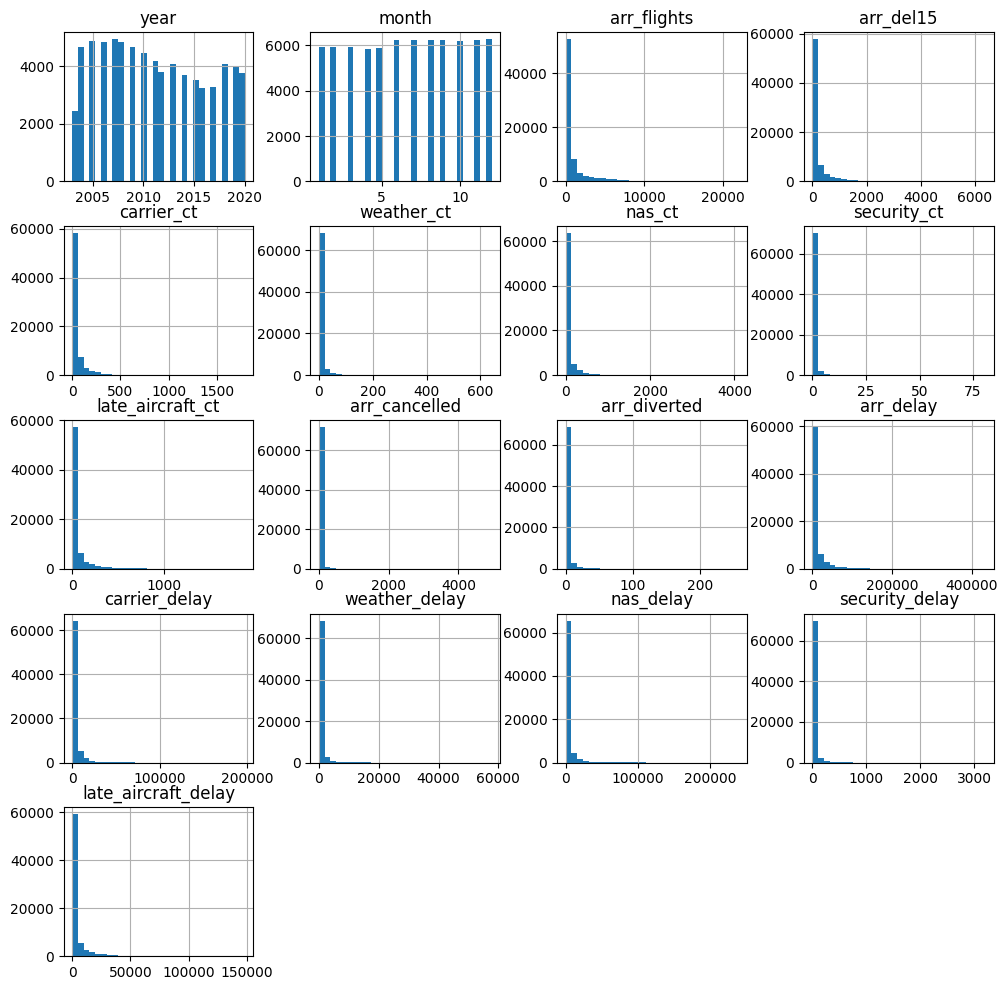

In [275]:
#Analysing numerical values and visulising outliers
flight_data_df.hist(figsize=(12, 12), bins=30)
plt.show()

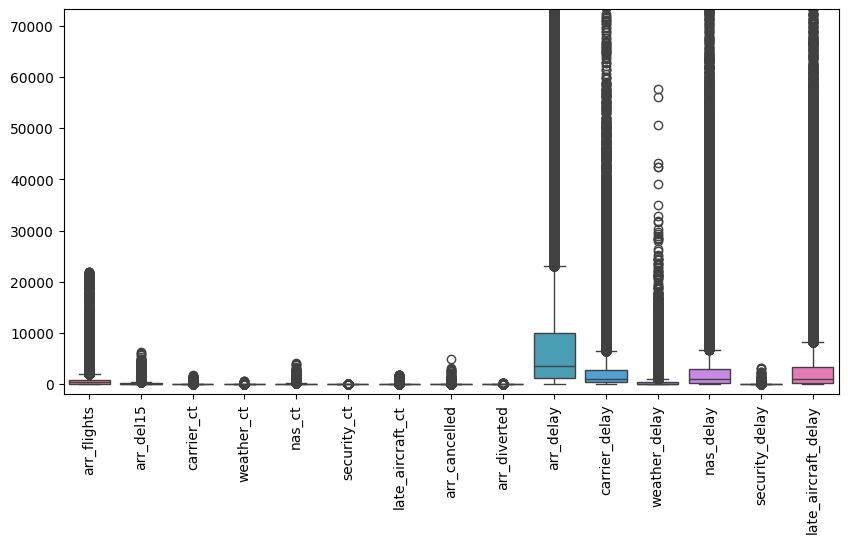

In [276]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=flight_data_df.select_dtypes(include=['float64']))
plt.ylim(-2000, 73211)
plt.xticks(rotation=90)
plt.show()


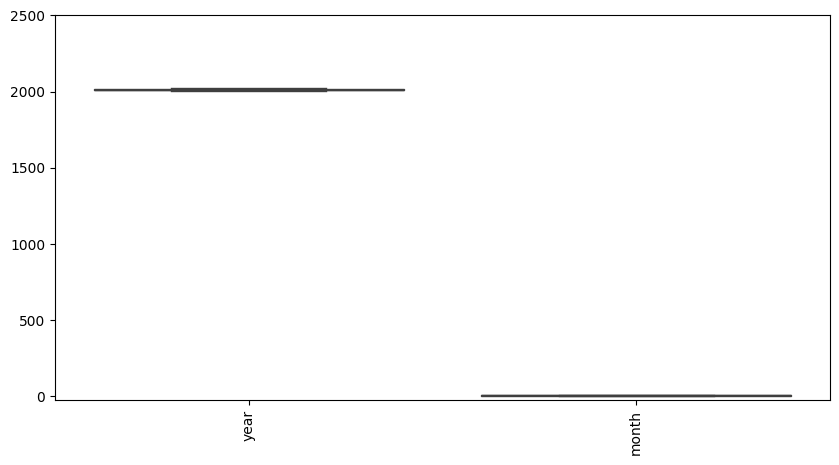

In [318]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=flight_data_df.select_dtypes(include=['int64']))
plt.ylim(-25, 2500)
plt.xticks(rotation=90)
plt.show()

In [278]:
# Count unique values in each categorical column
flight_data_df.select_dtypes(include=['object']).nunique()

carrier         28
carrier_name    32
airport         30
airport_name    30
dtype: int64

In [279]:
#mapping aiport to airport_name
airport_name_mapping = flight_data_df.groupby('airport')['airport_name'].unique().reset_index()
print(airport_name_mapping)

   airport                                       airport_name
0      ATL  [Atlanta, GA: Hartsfield-Jackson Atlanta Inter...
1      BOS                  [Boston, MA: Logan International]
2      BWI  [Baltimore, MD: Baltimore/Washington Internati...
3      CLT   [Charlotte, NC: Charlotte Douglas International]
4      DCA  [Washington, DC: Ronald Reagan Washington Nati...
5      DEN                 [Denver, CO: Denver International]
6      DFW  [Dallas/Fort Worth, TX: Dallas/Fort Worth Inte...
7      DTW          [Detroit, MI: Detroit Metro Wayne County]
8      EWR         [Newark, NJ: Newark Liberty International]
9      FLL  [Fort Lauderdale, FL: Fort Lauderdale-Hollywoo...
10     HNL      [Honolulu, HI: Daniel K Inouye International]
11     IAD  [Washington, DC: Washington Dulles International]
12     IAH  [Houston, TX: George Bush Intercontinental/Hou...
13     JFK      [New York, NY: John F. Kennedy International]
14     LAS            [Las Vegas, NV: McCarran International]
15     L

We observe that the feature `carrier` and `carrier_name` should have same number of unique categories.Lets investigate this.

In [280]:
carrier_name_mapping = flight_data_df.groupby('carrier')['carrier_name'].unique().reset_index()
print(carrier_name_mapping)

   carrier                                       carrier_name
0       9E        [Pinnacle Airlines Inc., Endeavor Air Inc.]
1       AA                           [American Airlines Inc.]
2       AQ                              [Aloha Airlines Inc.]
3       AS                             [Alaska Airlines Inc.]
4       B6                                  [JetBlue Airways]
5       CO                       [Continental Air Lines Inc.]
6       DH        [Atlantic Coast Airlines, Independence Air]
7       DL                             [Delta Air Lines Inc.]
8       EV  [Atlantic Southeast Airlines, ExpressJet Airli...
9       F9                           [Frontier Airlines Inc.]
10      FL                      [AirTran Airways Corporation]
11      G4                                    [Allegiant Air]
12      HA                           [Hawaiian Airlines Inc.]
13      HP                       [America West Airlines Inc.]
14      MQ          [American Eagle Airlines Inc., Envoy Air]
15      

We observe the following:
* carrier `9E` belongs Pinnacle Airlines Inc. but was rebranded as Endeavor Air Inc. 
* `MQ` was American Eagle Airlines Inc., which later rebranded as Envoy Air. 
* `EV` represents both Atlantic Southeast Airlines and ExpressJet Airlines, which were merged but continued using the same carrier code.
* `DH` was initially Atlantic Coast Airlines, which rebranded as Independence Air before ceasing operations.
* `OH` represents both Comair Inc. and PSA Airlines Inc., as PSA Airlines may have taken over operations from Comair.

We aim to standardise the naming to avoid redundancy of data and create a standardisation function through which we update the update the `carrier_name` based on the last update.


In [281]:
# Sorting the dataset by year to ensure the latest carrier name is selected
df_sorted = flight_data_df.sort_values(by='year', ascending=True)

# Creating a mapping of carrier codes to their most recent carrier name
carrier_standardized_mapping = df_sorted.groupby('carrier')['carrier_name'].last().to_dict()

# Apply the mapping to the dataset to standardize the carrier names
flight_data_df['carrier_name'] = flight_data_df['carrier'].map(carrier_standardized_mapping)

In [282]:
#now we check if the error is resolve
# Count unique values in each categorical column
flight_data_df.select_dtypes(include=['object']).nunique()

carrier         28
carrier_name    27
airport         30
airport_name    30
dtype: int64

Still we notice, that the values are not same. Lets map them again.

In [283]:
carrier_name_mapping = flight_data_df.groupby('carrier')['carrier_name'].unique().reset_index()
print(carrier_name_mapping)

   carrier                   carrier_name
0       9E            [Endeavor Air Inc.]
1       AA       [American Airlines Inc.]
2       AQ          [Aloha Airlines Inc.]
3       AS         [Alaska Airlines Inc.]
4       B6              [JetBlue Airways]
5       CO   [Continental Air Lines Inc.]
6       DH             [Independence Air]
7       DL         [Delta Air Lines Inc.]
8       EV      [ExpressJet Airlines LLC]
9       F9       [Frontier Airlines Inc.]
10      FL  [AirTran Airways Corporation]
11      G4                [Allegiant Air]
12      HA       [Hawaiian Airlines Inc.]
13      HP   [America West Airlines Inc.]
14      MQ                    [Envoy Air]
15      NK             [Spirit Air Lines]
16      NW      [Northwest Airlines Inc.]
17      OH            [PSA Airlines Inc.]
18      OO        [SkyWest Airlines Inc.]
19      RU     [ExpressJet Airlines Inc.]
20      TZ       [ATA Airlines d/b/a ATA]
21      UA        [United Air Lines Inc.]
22      US              [US Airway

We notice that ExpressJet Airlines Inc. has two carrier code "XE" and "RU". ExpressJet historically had two carrier codes because it operated under different identities at various points in its history, sometimes operating as a separate entity and sometimes as a subsidiary of another airline, leading to the use of different codes depending on the operating arrangement at the time. To avoid confusion, we rename the carrier_name to include code to avoid loss of data.

In [284]:
# Identifying which carrier codes map to "ExpressJet Airlines Inc."
expressjet_carriers = flight_data_df[flight_data_df['carrier_name'] == "ExpressJet Airlines Inc."]['carrier'].unique()

# Updating carrier names to ensure uniqueness by appending carrier codes
for carrier in expressjet_carriers:
    flight_data_df.loc[flight_data_df['carrier'] == carrier, 'carrier_name'] = f"ExpressJet Airlines Inc. ({carrier})"

#now we check if the error is resolve
# Count unique values in each categorical column
flight_data_df.select_dtypes(include=['object']).nunique()

carrier         28
carrier_name    28
airport         30
airport_name    30
dtype: int64

In [285]:
#checking the final mapping
carrier_name_mapping = flight_data_df.groupby('carrier')['carrier_name'].unique().reset_index()
print(carrier_name_mapping)

   carrier                     carrier_name
0       9E              [Endeavor Air Inc.]
1       AA         [American Airlines Inc.]
2       AQ            [Aloha Airlines Inc.]
3       AS           [Alaska Airlines Inc.]
4       B6                [JetBlue Airways]
5       CO     [Continental Air Lines Inc.]
6       DH               [Independence Air]
7       DL           [Delta Air Lines Inc.]
8       EV        [ExpressJet Airlines LLC]
9       F9         [Frontier Airlines Inc.]
10      FL    [AirTran Airways Corporation]
11      G4                  [Allegiant Air]
12      HA         [Hawaiian Airlines Inc.]
13      HP     [America West Airlines Inc.]
14      MQ                      [Envoy Air]
15      NK               [Spirit Air Lines]
16      NW        [Northwest Airlines Inc.]
17      OH              [PSA Airlines Inc.]
18      OO          [SkyWest Airlines Inc.]
19      RU  [ExpressJet Airlines Inc. (RU)]
20      TZ         [ATA Airlines d/b/a ATA]
21      UA          [United Air 

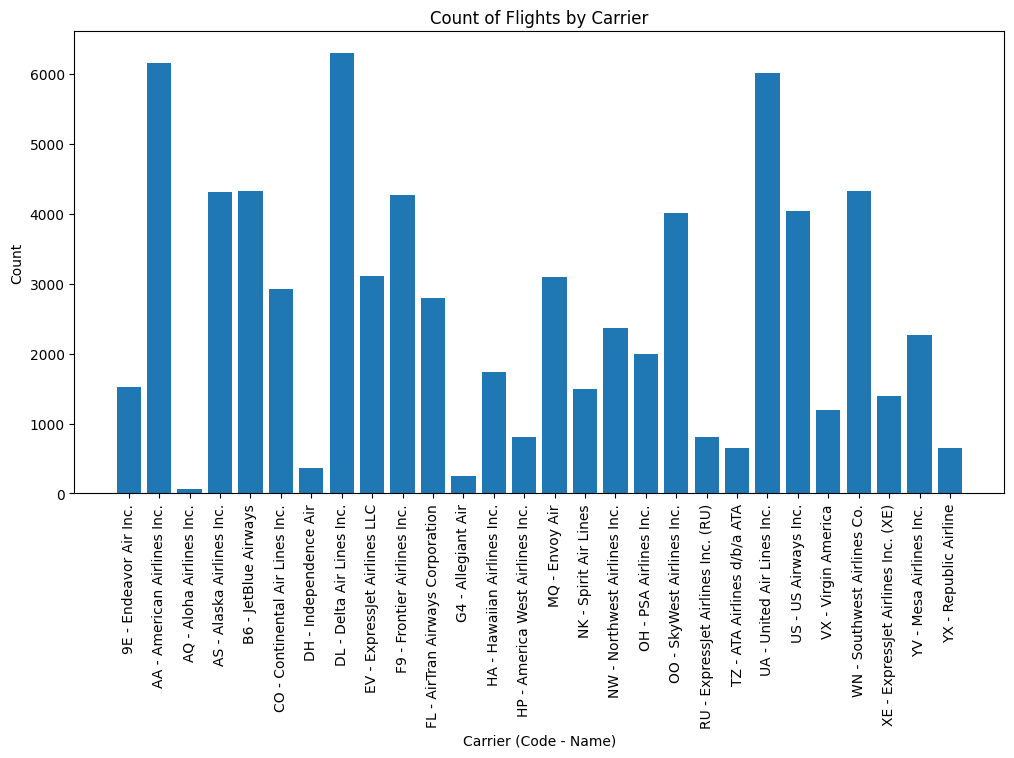

In [286]:
# Countplot for a categorical column 
carrier_counts = flight_data_df.groupby(['carrier', 'carrier_name']).size().reset_index(name='count')

# Create labels combining carrier code and name for the plot
carrier_counts['label'] = carrier_counts['carrier'] + " - " + carrier_counts['carrier_name']

# Plot the updated graph without creating another column in the main dataframe
plt.figure(figsize=(12, 6))
plt.bar(carrier_counts['label'], carrier_counts['count'])
plt.xticks(rotation=90)
plt.xlabel("Carrier (Code - Name)")
plt.ylabel("Count")
plt.title("Count of Flights by Carrier")
plt.show()

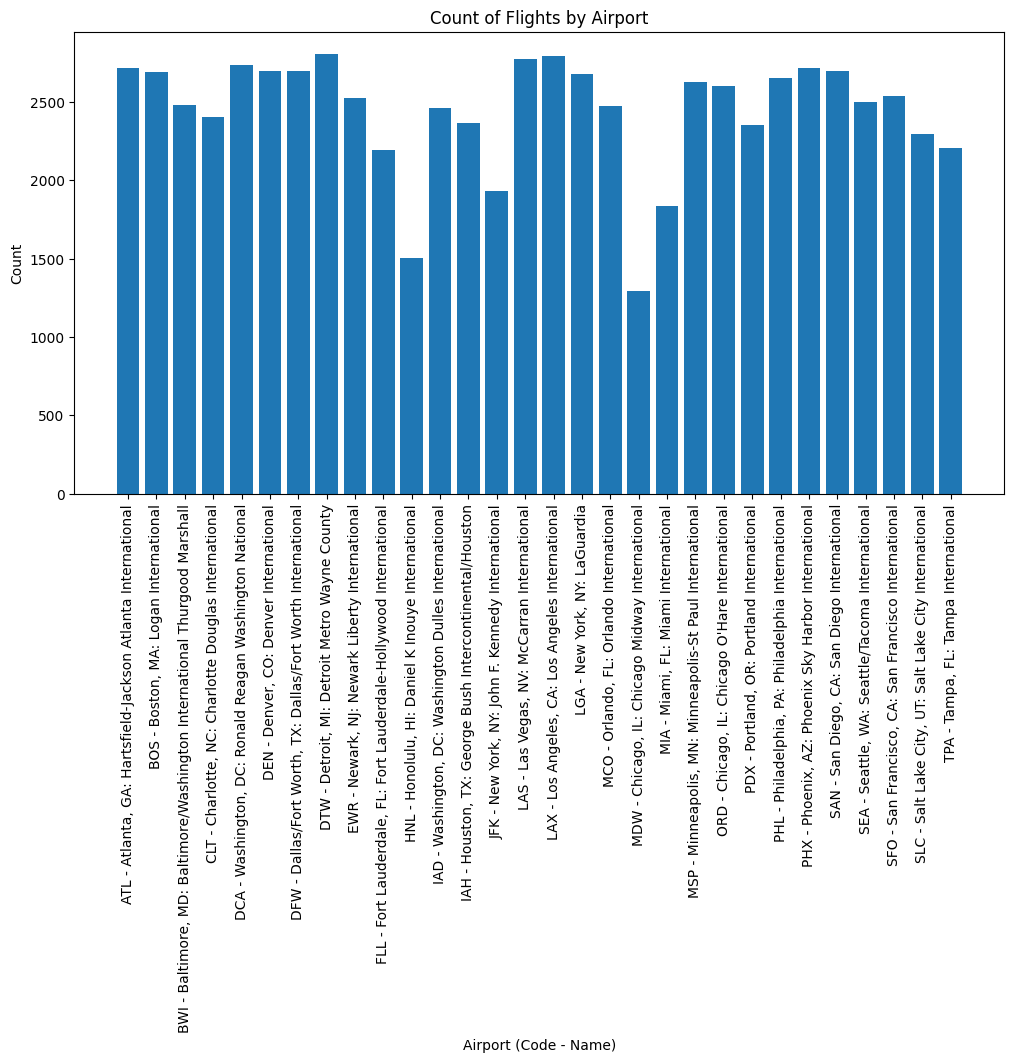

In [287]:
# Countplot for a categorical column 
carrier_counts = flight_data_df.groupby(['airport', 'airport_name']).size().reset_index(name='count')

# Create labels combining carrier code and name for the plot
carrier_counts['label'] = carrier_counts['airport'] + " - " + carrier_counts['airport_name']

# Plot the updated graph without creating another column in the main dataframe
plt.figure(figsize=(12, 6))
plt.bar(carrier_counts['label'], carrier_counts['count'])
plt.xticks(rotation=90)
plt.xlabel("Airport (Code - Name)")
plt.ylabel("Count")
plt.title("Count of Flights by Airport")
plt.show()

In [288]:
#Busiest Airport by Season, Year Analysis
airport_flight_counts = flight_data_df.groupby("airport_name")["arr_flights"].sum().sort_values(ascending=False)
print(airport_flight_counts)

airport_name
Atlanta, GA: Hartsfield-Jackson Atlanta International                  6852222.0
Chicago, IL: Chicago O'Hare International                              5563360.0
Dallas/Fort Worth, TX: Dallas/Fort Worth International                 4806119.0
Denver, CO: Denver International                                       3891613.0
Los Angeles, CA: Los Angeles International                             3762144.0
Houston, TX: George Bush Intercontinental/Houston                      3091354.0
Phoenix, AZ: Phoenix Sky Harbor International                          3087998.0
Las Vegas, NV: McCarran International                                  2702222.0
San Francisco, CA: San Francisco International                         2617005.0
Charlotte, NC: Charlotte Douglas International                         2396454.0
Detroit, MI: Detroit Metro Wayne County                                2395448.0
Minneapolis, MN: Minneapolis-St Paul International                     2302786.0
Newark, NJ: New

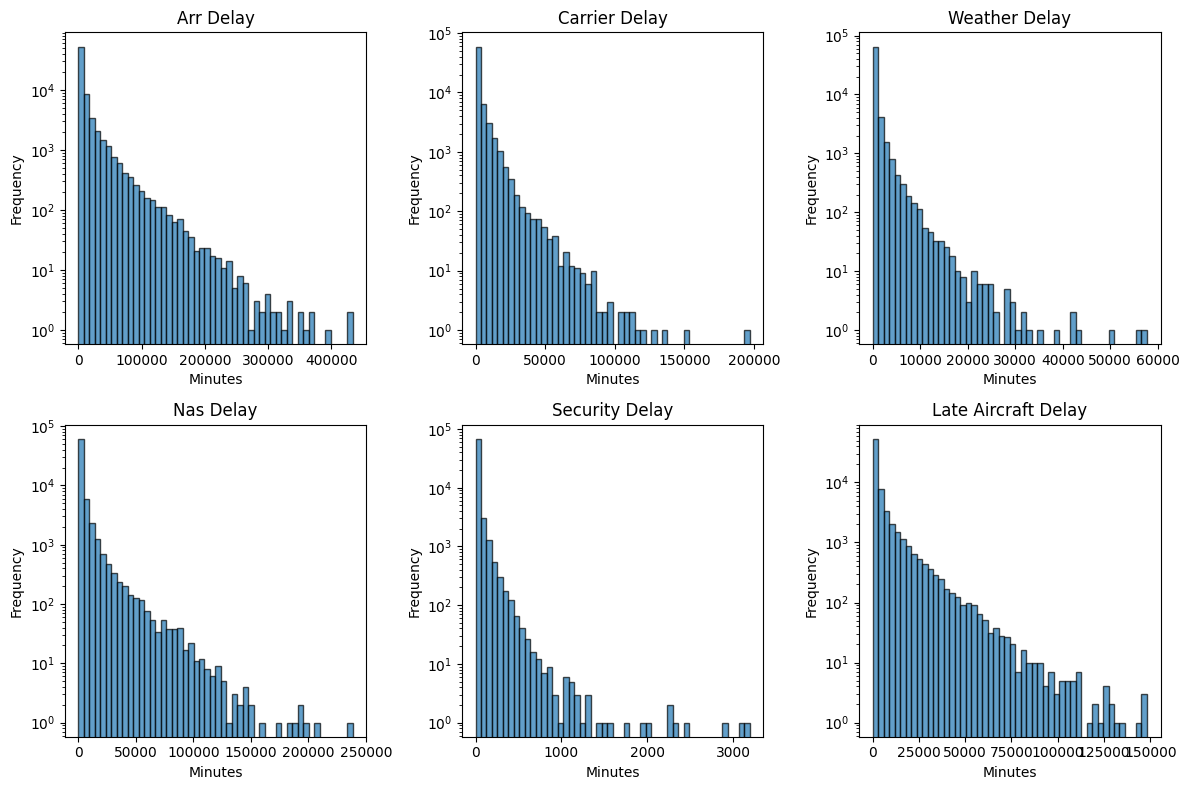

In [289]:
#Delay Analysis

# Select delay-related columns for visualization
delay_columns = ["arr_delay", "carrier_delay", "weather_delay", "nas_delay", "security_delay", "late_aircraft_delay"]

# Plot histograms for delay distributions
plt.figure(figsize=(12, 8))
for i, col in enumerate(delay_columns, 1):
    plt.subplot(2, 3, i)
    plt.hist(flight_data_df[col], bins=50, edgecolor='black', alpha=0.7)
    plt.title(col.replace("_", " ").title())
    plt.xlabel("Minutes")
    plt.ylabel("Frequency")
    plt.yscale("log")  # Log scale to handle skewness

plt.tight_layout()
plt.show()

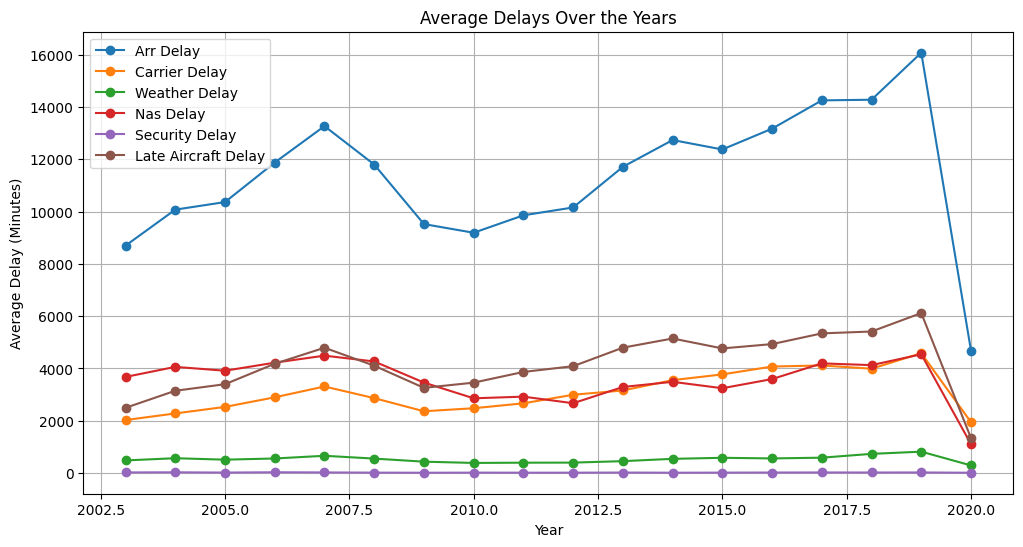

In [290]:
# Group data by year and calculate mean delays
yearly_delays = flight_data_df.groupby("year")[delay_columns].mean()

# Plot trends over time
plt.figure(figsize=(12, 6))
for col in delay_columns:
    plt.plot(yearly_delays.index, yearly_delays[col], marker='o', label=col.replace("_", " ").title())

plt.title("Average Delays Over the Years")
plt.xlabel("Year")
plt.ylabel("Average Delay (Minutes)")
plt.legend()
plt.grid(True)
plt.show()

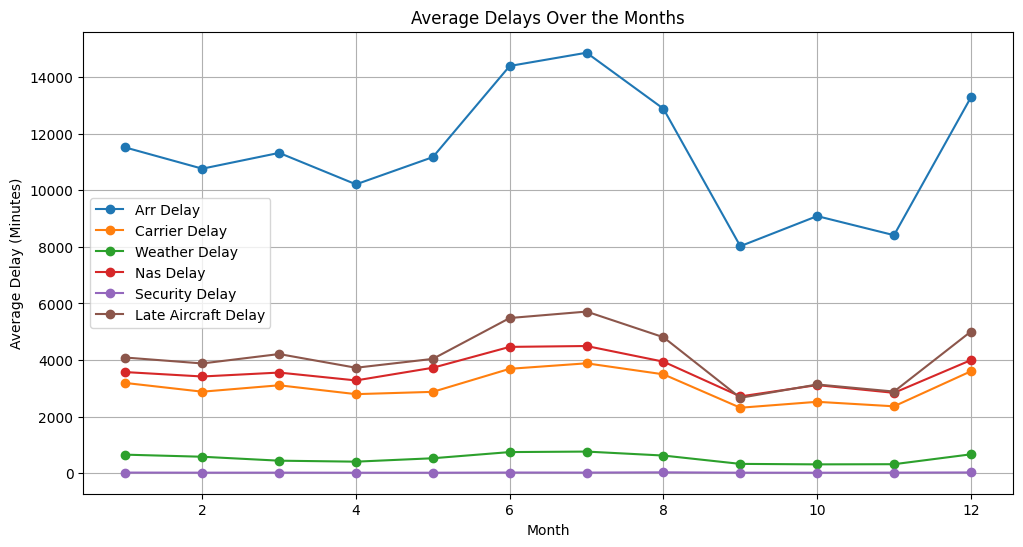

In [291]:
# Group data by year and calculate mean delays
monthly_delays = flight_data_df.groupby("month")[delay_columns].mean()

# Plot trends over time
plt.figure(figsize=(12, 6))
for col in delay_columns:
    plt.plot(monthly_delays.index, monthly_delays[col], marker='o', label=col.replace("_", " ").title())

plt.title("Average Delays Over the Months")
plt.xlabel("Month")
plt.ylabel("Average Delay (Minutes)")
plt.legend()
plt.grid(True)
plt.show()

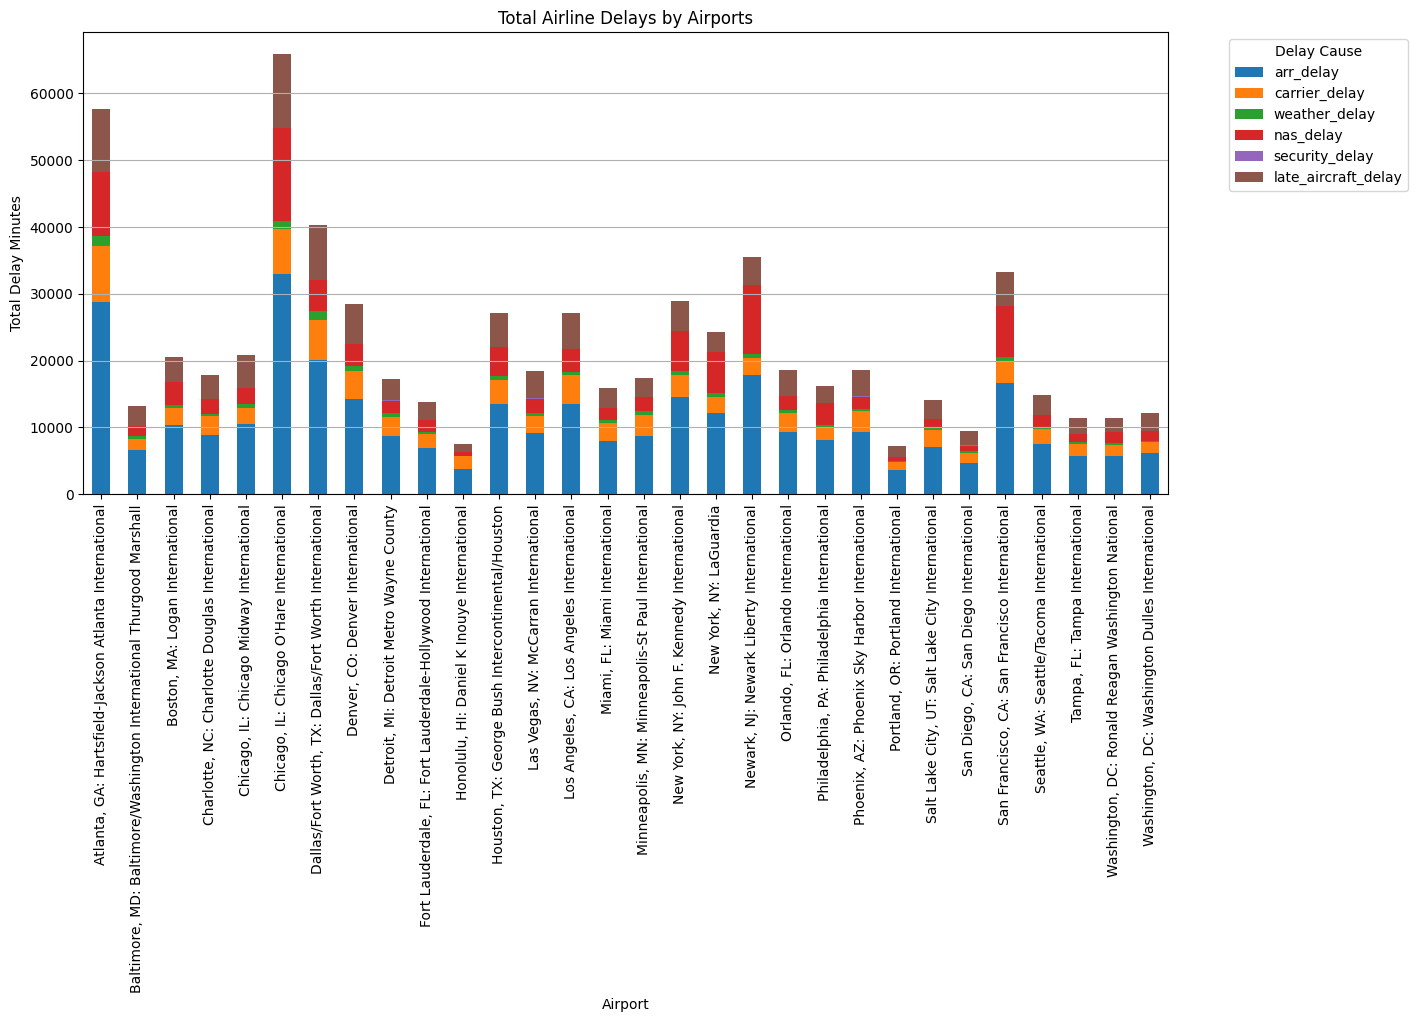

In [292]:
# Group data by year and calculate mean delays
airport_name_delays = flight_data_df.groupby("airport_name")[delay_columns].mean()

# Plot trends over time
airport_name_delays.plot(kind="bar", stacked=True, figsize=(14, 6))
plt.title("Total Airline Delays by Airports")
plt.xlabel("Airport")
plt.ylabel("Total Delay Minutes")
plt.legend(title="Delay Cause", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y')
plt.show()

In [293]:
airport_delays = flight_data_df.groupby("airport")[delay_columns].mean().sort_values("arr_delay", ascending=False).head(10)
print("Top 10 airports with Maximum Delay")
print(airport_delays)

Top 10 airports with Maximum Delay
            arr_delay  carrier_delay  weather_delay     nas_delay  \
airport                                                             
ORD      32921.676787    6755.410069    1242.169101  13831.124904   
ATL      28836.489691    8259.093888    1513.725331   9585.309278   
DFW      20140.122358    5927.460882    1283.501669   4707.952540   
EWR      17778.817102    2556.455265     613.433492  10290.086302   
SFO      16627.083268    3329.007893     518.916338   7657.603394   
JFK      14487.529564    3422.620851     598.167531   5947.340249   
DEN      14247.161410    4240.760668     661.124304   3320.556586   
LAX      13574.852794    4254.783668     525.602794   3321.733524   
IAH      13529.689480    3506.900718     720.737220   4256.779890   
LGA      12148.874580    2377.467339     641.214632   6113.318029   

         security_delay  late_aircraft_delay  
airport                                       
ORD           23.895081         11069.0776

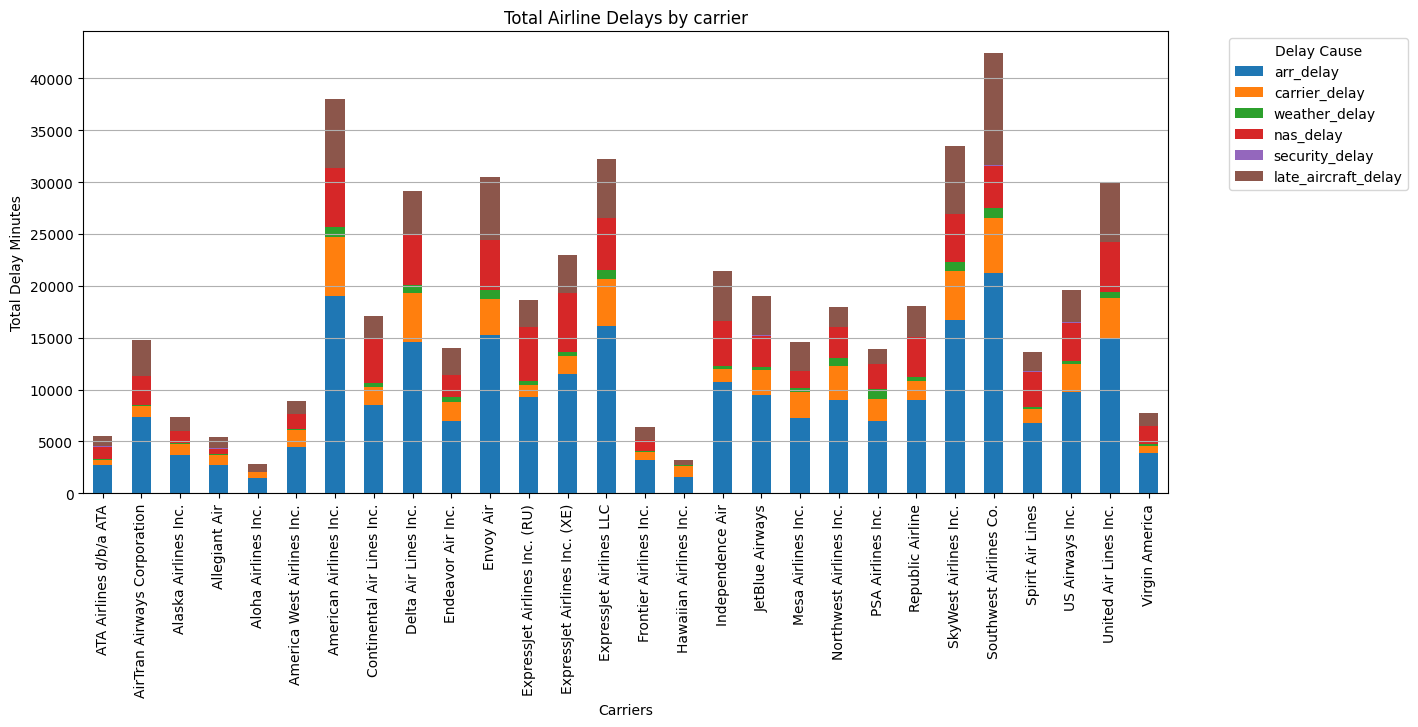

In [294]:
# Group data by year and calculate mean delays
carrier_name_delays = flight_data_df.groupby("carrier_name")[delay_columns].mean()

# Plot trends over time
carrier_name_delays.plot(kind="bar", stacked=True, figsize=(14, 6))
plt.title("Total Airline Delays by carrier")
plt.xlabel("Carriers")
plt.ylabel("Total Delay Minutes")
plt.legend(title="Delay Cause", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y')
plt.show()

In [295]:
carrier_delays = flight_data_df.groupby("carrier_name")[delay_columns].mean().sort_values("arr_delay", ascending=False).head(10)
print("Top 10 Carriers with Maximum Delay")
print(airport_delays)

Top 10 Carriers with Maximum Delay
            arr_delay  carrier_delay  weather_delay     nas_delay  \
airport                                                             
ORD      32921.676787    6755.410069    1242.169101  13831.124904   
ATL      28836.489691    8259.093888    1513.725331   9585.309278   
DFW      20140.122358    5927.460882    1283.501669   4707.952540   
EWR      17778.817102    2556.455265     613.433492  10290.086302   
SFO      16627.083268    3329.007893     518.916338   7657.603394   
JFK      14487.529564    3422.620851     598.167531   5947.340249   
DEN      14247.161410    4240.760668     661.124304   3320.556586   
LAX      13574.852794    4254.783668     525.602794   3321.733524   
IAH      13529.689480    3506.900718     720.737220   4256.779890   
LGA      12148.874580    2377.467339     641.214632   6113.318029   

         security_delay  late_aircraft_delay  
airport                                       
ORD           23.895081         11069.0776

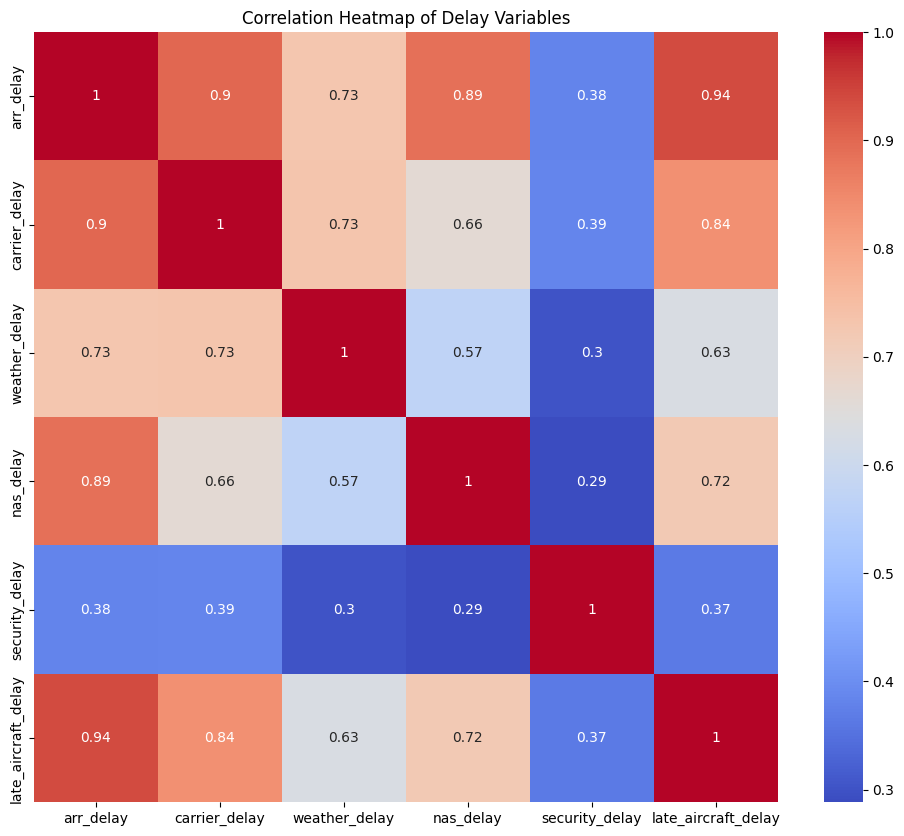

In [296]:
plt.figure(figsize=(12, 10))
sns.heatmap(flight_data_df[delay_columns].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Delay Variables')
plt.show()

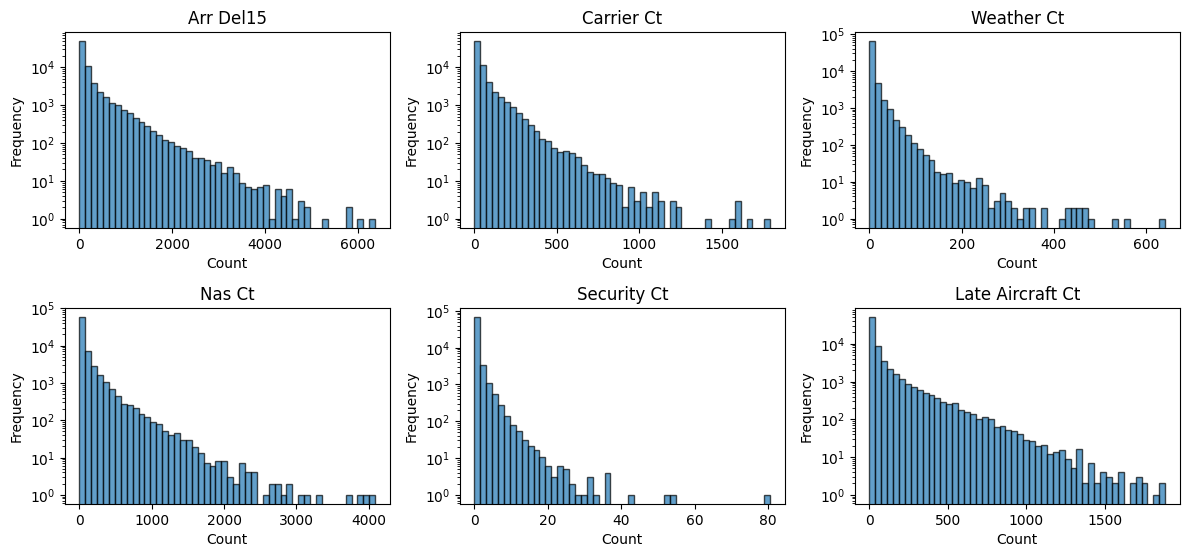

In [297]:
#Count Analysis

# Select delay-related columns for visualization
delay_count_columns = ["arr_del15", "carrier_ct", "weather_ct", "nas_ct", "security_ct", "late_aircraft_ct"]

# Plot histograms for count-related variables
plt.figure(figsize=(12, 8))
for i, col in enumerate(delay_count_columns, 1):
    plt.subplot(3, 3, i)
    plt.hist(flight_data_df[col].dropna(), bins=50, edgecolor='black', alpha=0.7)
    plt.title(col.replace("_", " ").title())
    plt.xlabel("Count")
    plt.ylabel("Frequency")
    plt.yscale("log")  # Log scale to handle skewness

plt.tight_layout()
plt.show()

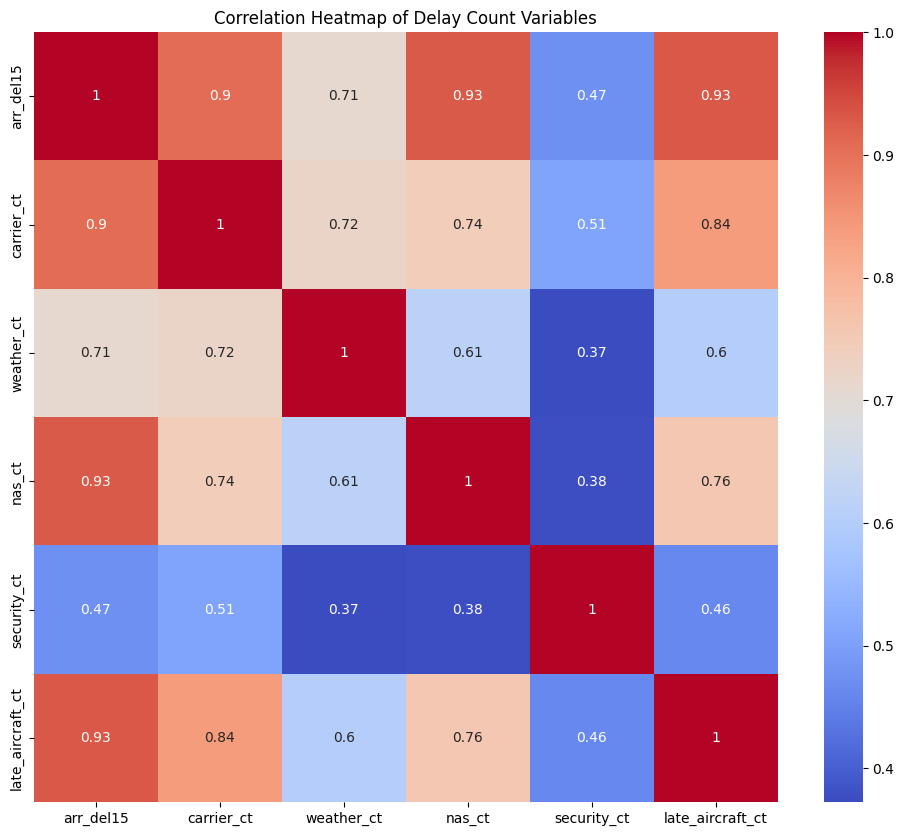

In [298]:
plt.figure(figsize=(12, 10))
sns.heatmap(flight_data_df[delay_count_columns].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Delay Count Variables')
plt.show()

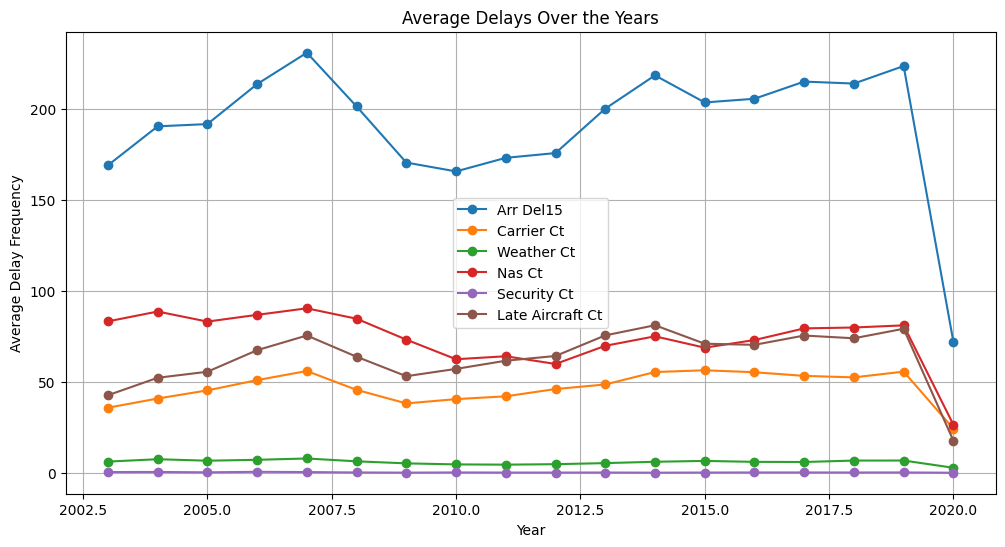

In [299]:
# Group data by year and calculate mean delays
yearly_delays = flight_data_df.groupby("year")[delay_count_columns].mean()

# Plot trends over time
plt.figure(figsize=(12, 6))
for col in delay_count_columns:
    plt.plot(yearly_delays.index, yearly_delays[col], marker='o', label=col.replace("_", " ").title())

plt.title("Average Delays Over the Years")
plt.xlabel("Year")
plt.ylabel("Average Delay Frequency")
plt.legend()
plt.grid(True)
plt.show()

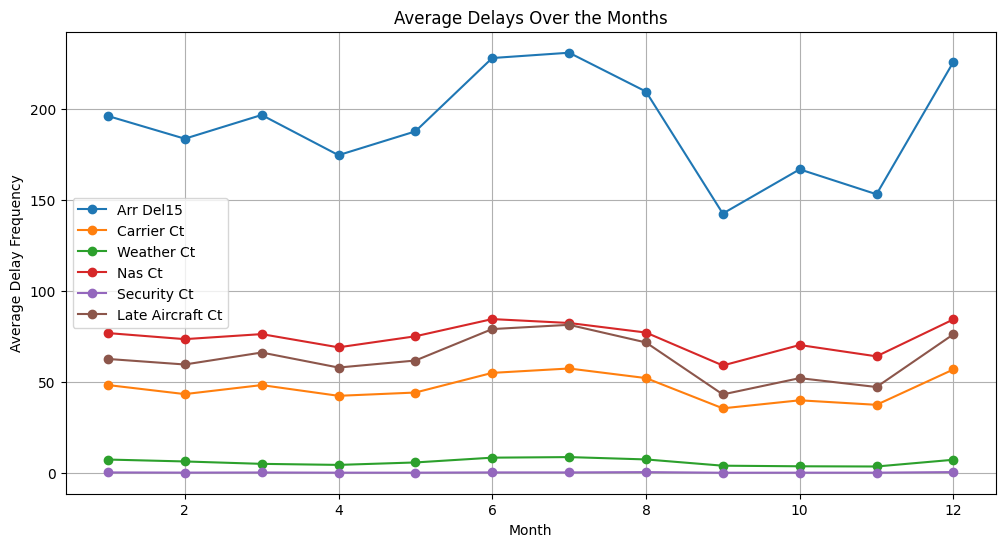

In [300]:
# Group data by year and calculate mean delays
monthly_delays = flight_data_df.groupby("month")[delay_count_columns].mean()

# Plot trends over time
plt.figure(figsize=(12, 6))
for col in delay_count_columns:
    plt.plot(monthly_delays.index, monthly_delays[col], marker='o', label=col.replace("_", " ").title())

plt.title("Average Delays Over the Months")
plt.xlabel("Month")
plt.ylabel("Average Delay Frequency")
plt.legend()
plt.grid(True)
plt.show()

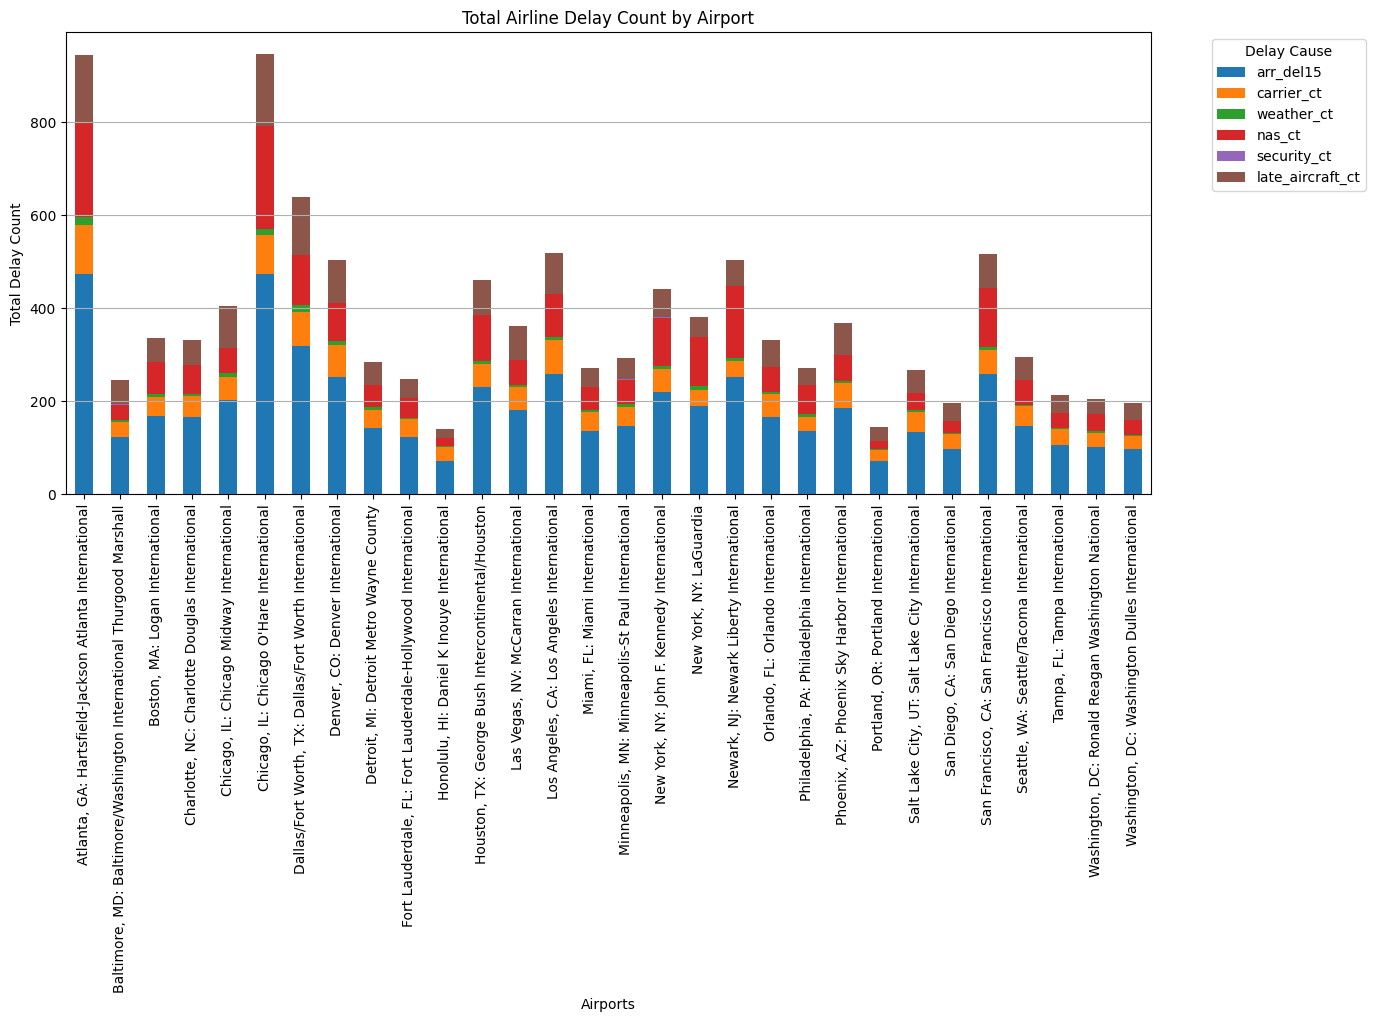

In [301]:
# Group data by year and calculate mean delays
airport_name_delay_count = flight_data_df.groupby("airport_name")[delay_count_columns].mean()

# Plot trends over time
airport_name_delay_count.plot(kind="bar", stacked=True, figsize=(14, 6))
plt.title("Total Airline Delay Count by Airport")
plt.xlabel("Airports")
plt.ylabel("Total Delay Count")
plt.legend(title="Delay Cause", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y')
plt.show()

In [302]:
airport_delay_count = flight_data_df.groupby("airport")[delay_columns].mean().sort_values("arr_delay", ascending=False).head(10)
print("Top 10 airports with Maximum Delay")
print(airport_delay_count)

Top 10 airports with Maximum Delay
            arr_delay  carrier_delay  weather_delay     nas_delay  \
airport                                                             
ORD      32921.676787    6755.410069    1242.169101  13831.124904   
ATL      28836.489691    8259.093888    1513.725331   9585.309278   
DFW      20140.122358    5927.460882    1283.501669   4707.952540   
EWR      17778.817102    2556.455265     613.433492  10290.086302   
SFO      16627.083268    3329.007893     518.916338   7657.603394   
JFK      14487.529564    3422.620851     598.167531   5947.340249   
DEN      14247.161410    4240.760668     661.124304   3320.556586   
LAX      13574.852794    4254.783668     525.602794   3321.733524   
IAH      13529.689480    3506.900718     720.737220   4256.779890   
LGA      12148.874580    2377.467339     641.214632   6113.318029   

         security_delay  late_aircraft_delay  
airport                                       
ORD           23.895081         11069.0776

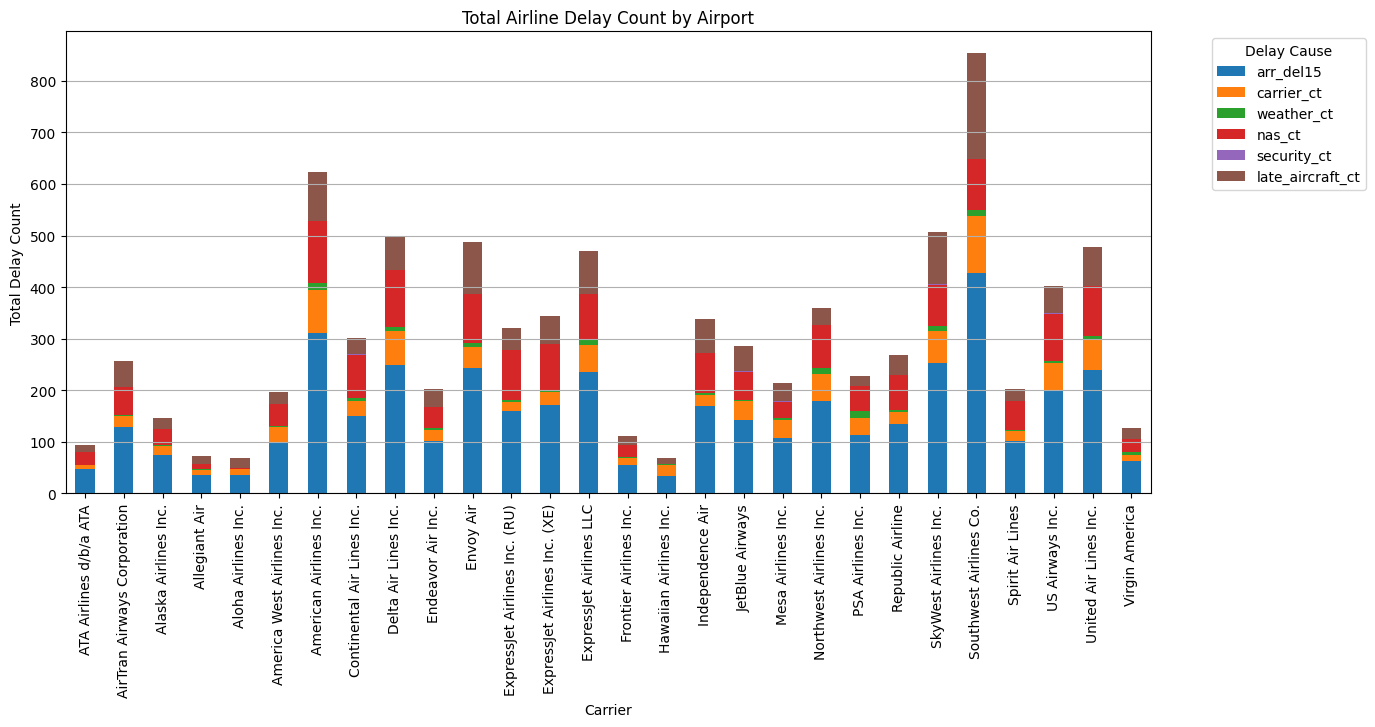

In [303]:
# Group data by year and calculate mean delays
carrier_name_delay_count = flight_data_df.groupby("carrier_name")[delay_count_columns].mean()

# Plot trends over time
carrier_name_delay_count.plot(kind="bar", stacked=True, figsize=(14, 6))
plt.title("Total Airline Delay Count by Airport")
plt.xlabel("Carrier")
plt.ylabel("Total Delay Count")
plt.legend(title="Delay Cause", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y')
plt.show()

In [304]:
carrier_delay_count = flight_data_df.groupby("carrier")[delay_columns].mean().sort_values("arr_delay", ascending=False).head(10)
print("Top 10 airports with Maximum Delay")
print(carrier_delay_count)

Top 10 airports with Maximum Delay
            arr_delay  carrier_delay  weather_delay    nas_delay  \
carrier                                                            
WN       21203.081581    5320.826901     996.132424  4051.317079   
AA       18988.252963    5675.704497    1032.577204  5613.154733   
OO       16728.286177    4668.304857     884.764134  4605.806227   
EV       16123.369656    4567.163613     874.886532  4979.910318   
MQ       15252.483392    3464.803289     847.807804  4827.975814   
UA       15016.866389    3808.043594     538.879534  4872.717138   
DL       14566.479886    4781.824614     689.309111  4925.095246   
XE       11464.991392    1800.748207     371.687948  5628.187231   
DH       10712.195592    1288.840220     270.975207  4301.768595   
US        9800.791863    2650.155545     305.022327  3704.816175   

         security_delay  late_aircraft_delay  
carrier                                       
WN            54.400508         10780.404668  
AA     

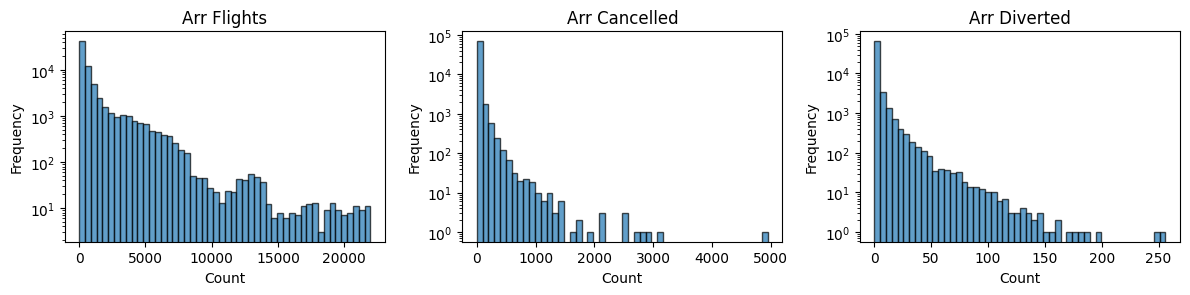

In [305]:
#Arrival, cancellation and Diversion

# Select delay-related columns for visualization
operational_count_columns = ["arr_flights", "arr_cancelled", "arr_diverted"]

# Plot histograms for count-related variables
plt.figure(figsize=(12, 8))
for i, col in enumerate(operational_count_columns, 1):
    plt.subplot(3, 3, i)
    plt.hist(flight_data_df[col].dropna(), bins=50, edgecolor='black', alpha=0.7)
    plt.title(col.replace("_", " ").title())
    plt.xlabel("Count")
    plt.ylabel("Frequency")
    plt.yscale("log")  # Log scale to handle skewness

plt.tight_layout()
plt.show()

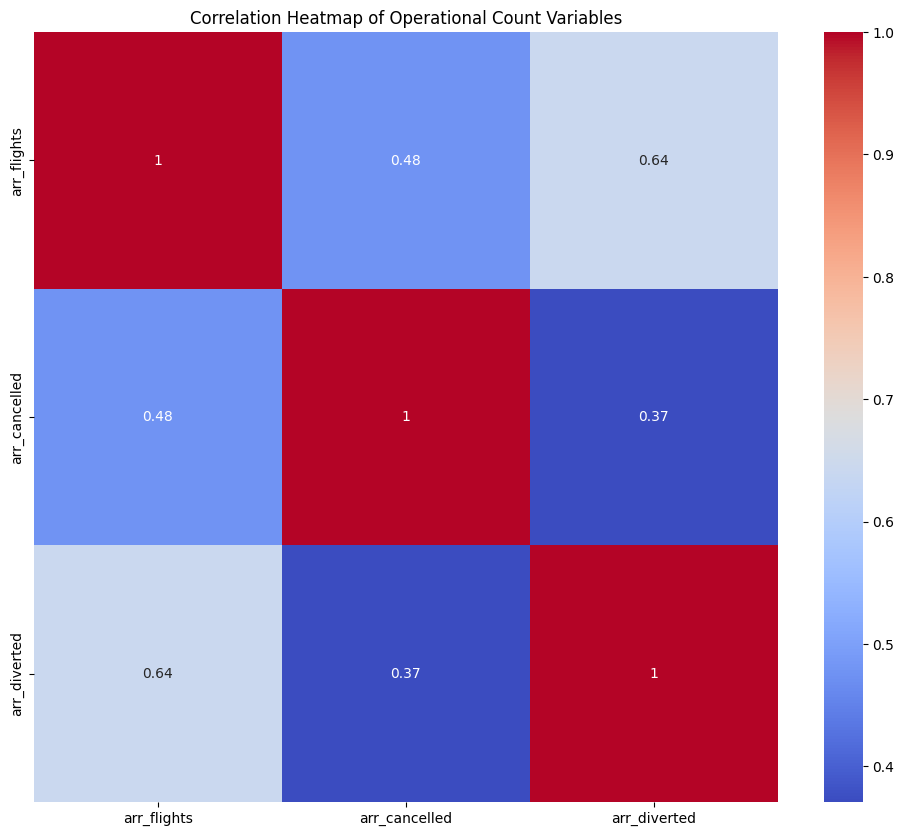

In [306]:
plt.figure(figsize=(12, 10))
sns.heatmap(flight_data_df[operational_count_columns].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Operational Count Variables')
plt.show()

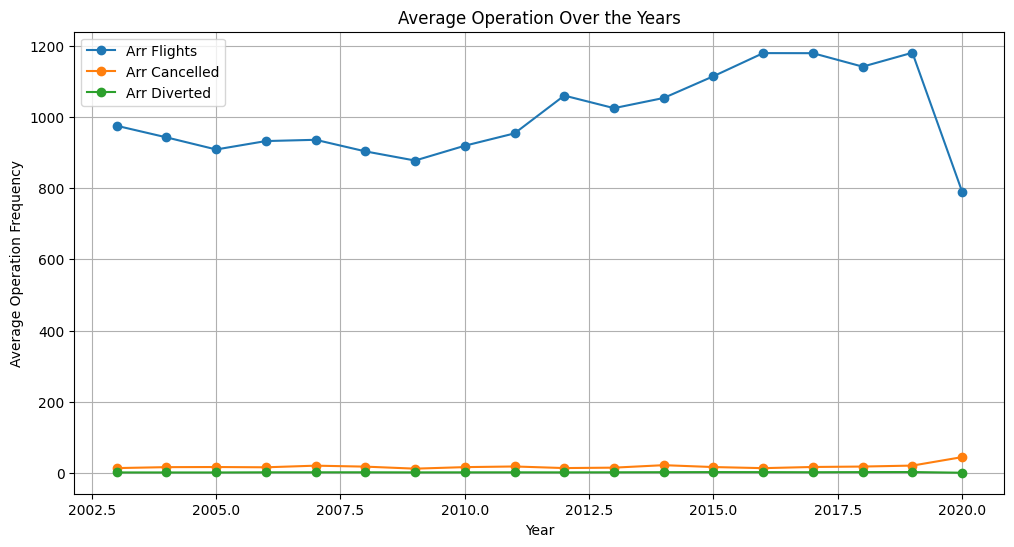

In [307]:
# Group data by year and calculate mean delays
yearly_delays = flight_data_df.groupby("year")[operational_count_columns].mean()

# Plot trends over time
plt.figure(figsize=(12, 6))
for col in operational_count_columns:
    plt.plot(yearly_delays.index, yearly_delays[col], marker='o', label=col.replace("_", " ").title())

plt.title("Average Operation Over the Years")
plt.xlabel("Year")
plt.ylabel("Average Operation Frequency")
plt.legend()
plt.grid(True)
plt.show()

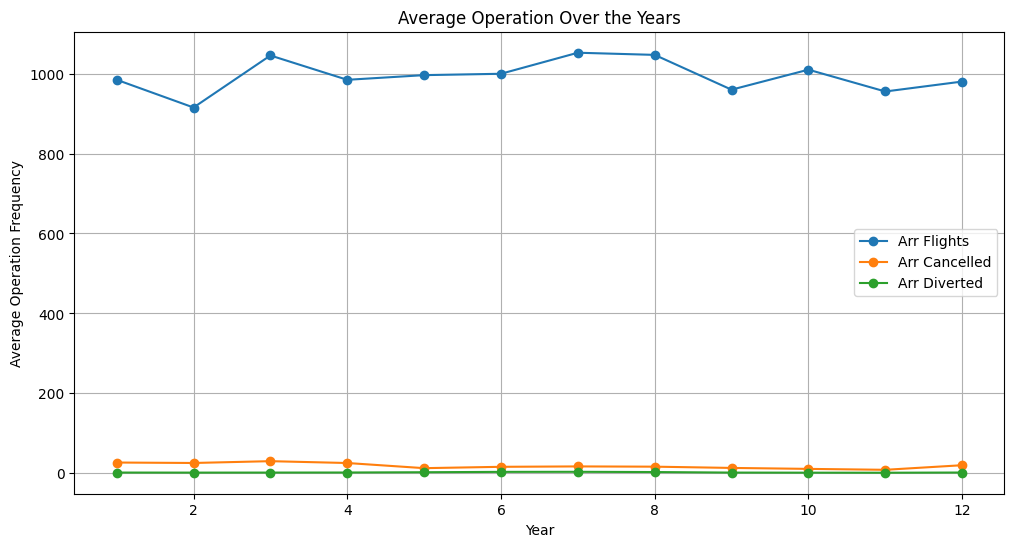

In [308]:
# Group data by year and calculate mean delays
yearly_delays = flight_data_df.groupby("month")[operational_count_columns].mean()

# Plot trends over time
plt.figure(figsize=(12, 6))
for col in operational_count_columns:
    plt.plot(yearly_delays.index, yearly_delays[col], marker='o', label=col.replace("_", " ").title())

plt.title("Average Operation Over the Years")
plt.xlabel("Year")
plt.ylabel("Average Operation Frequency")
plt.legend()
plt.grid(True)
plt.show()

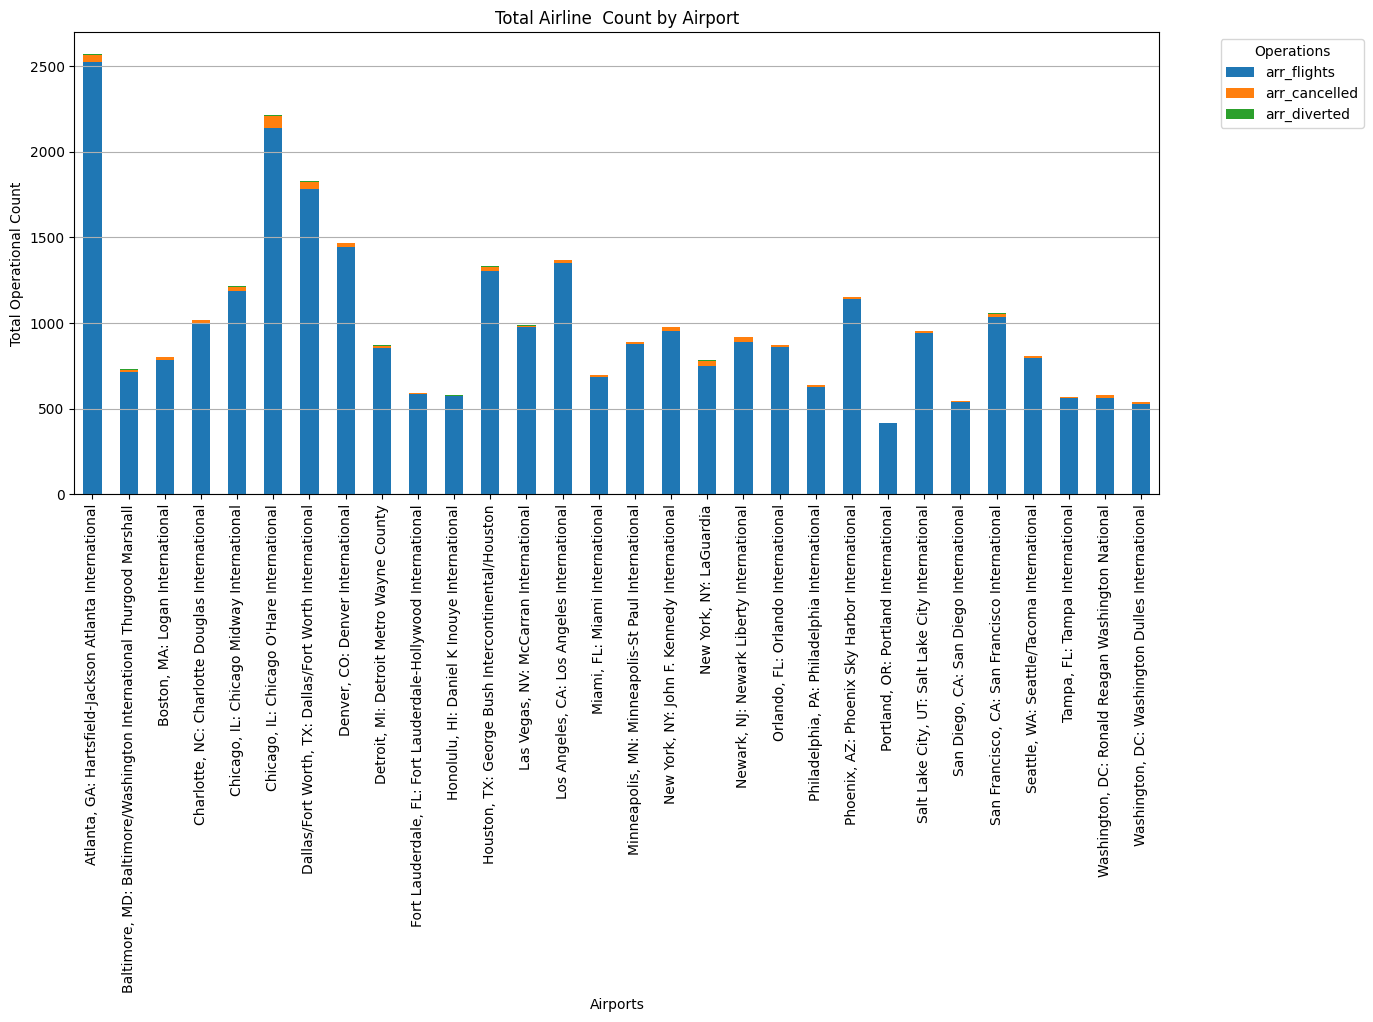

In [309]:
# Group data by year and calculate mean delays
airport_name_op_count = flight_data_df.groupby("airport_name")[operational_count_columns].mean()

# Plot trends over time
airport_name_op_count.plot(kind="bar", stacked=True, figsize=(14, 6))
plt.title("Total Airline  Count by Airport")
plt.xlabel("Airports")
plt.ylabel("Total Operational Count")
plt.legend(title="Operations", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y')
plt.show()

In [310]:
airport_op_count = flight_data_df.groupby("airport")[operational_count_columns].mean().sort_values("arr_flights", ascending=False).head(10)
print("Top 10 Airports with Maximum Arrivals")
print(airport_op_count)

Top 10 Airports with Maximum Arrivals
         arr_flights  arr_cancelled  arr_diverted
airport                                          
ATL      2522.909426      40.756259      5.340206
ORD      2138.109147      70.201384      5.031130
DFW      1782.024101      41.180200      7.307008
DEN      1444.012245      21.793692      3.279777
LAX      1347.472779      17.696275      1.643266
IAH      1306.021969      19.682298      5.161386
MDW      1187.770302      22.010828      4.625677
PHX      1136.965390      13.970545      1.567747
SFO      1032.756511      20.650750      2.000789
CLT       996.861065      19.644759      1.712562


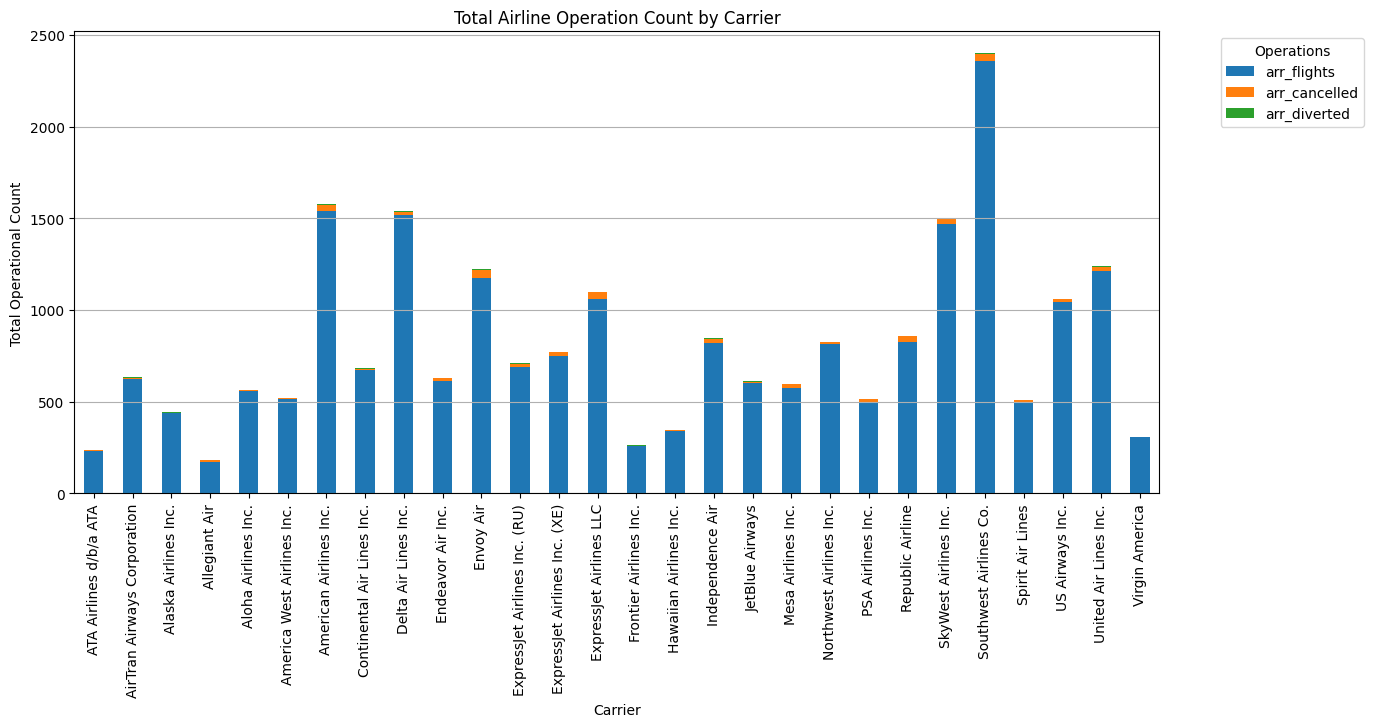

In [311]:
# Group data by year and calculate mean delays
carrier_name_op_count = flight_data_df.groupby("carrier_name")[operational_count_columns].mean()

# Plot trends over time
carrier_name_op_count.plot(kind="bar", stacked=True, figsize=(14, 6))
plt.title("Total Airline Operation Count by Carrier")
plt.xlabel("Carrier")
plt.ylabel("Total Operational Count")
plt.legend(title="Operations", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y')
plt.show()

In [312]:
carrier_op_count = flight_data_df.groupby("carrier_name")[operational_count_columns].mean().sort_values("arr_flights", ascending=False).head(10)
print("Top 10 carriers with Maximum Arrivals")
print(carrier_op_count)

Top 10 carriers with Maximum Arrivals
                         arr_flights  arr_cancelled  arr_diverted
carrier_name                                                     
Southwest Airlines Co.   2358.138895      36.571990      5.026115
American Airlines Inc.   1541.482546      31.418737      4.673486
Delta Air Lines Inc.     1516.626650      18.079186      3.148513
SkyWest Airlines Inc.    1466.395019      30.895890      2.391283
United Air Lines Inc.    1215.023461      19.604160      2.784359
Envoy Air                1174.910674      45.062238      3.019994
ExpressJet Airlines LLC  1062.640630      34.006429      2.809707
US Airways Inc.          1042.313570      16.337633      1.996031
Republic Airline          827.770769      27.940000      2.132308
Independence Air          817.986226      25.980716      1.371901


In [313]:
#top 10 busiest Airport-Carrier
# Aggregate total flights by (airport, carrier) combination
busiest_airport_carrier = flight_data_df.groupby(["airport_name", "carrier_name"])["arr_flights"].sum()

# Get the top 10 busiest airport-carrier combinations
busiest_airport_carrier = busiest_airport_carrier.sort_values(ascending=False).head(10)

print(busiest_airport_carrier)

airport_name                                                         carrier_name           
Atlanta, GA: Hartsfield-Jackson Atlanta International                Delta Air Lines Inc.       3530268.0
Dallas/Fort Worth, TX: Dallas/Fort Worth International               American Airlines Inc.     2666287.0
Atlanta, GA: Hartsfield-Jackson Atlanta International                ExpressJet Airlines LLC    1436251.0
Chicago, IL: Chicago O'Hare International                            United Air Lines Inc.      1343830.0
Las Vegas, NV: McCarran International                                Southwest Airlines Co.     1303867.0
Chicago, IL: Chicago Midway International                            Southwest Airlines Co.     1300704.0
Dallas/Fort Worth, TX: Dallas/Fort Worth International               Envoy Air                  1213133.0
Chicago, IL: Chicago O'Hare International                            Envoy Air                  1197034.0
                                                           

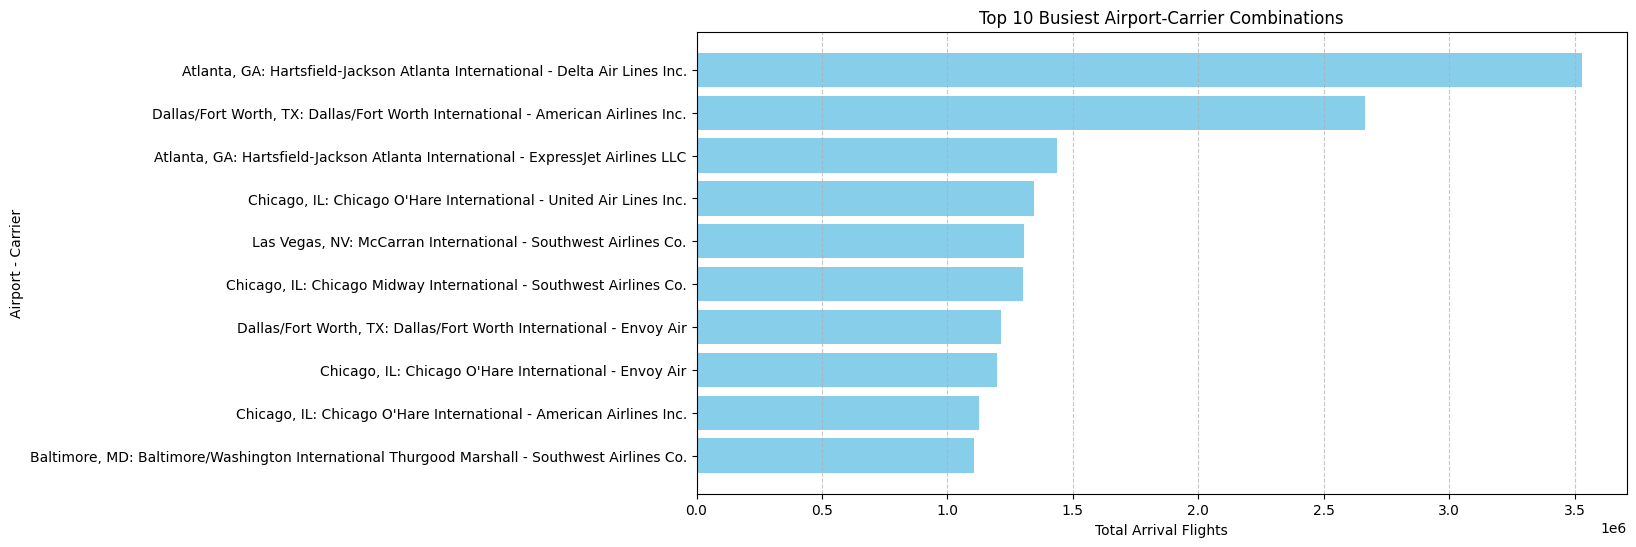

In [314]:
#Convert to DataFrame for plotting
busiest_airport_carrier_df = busiest_airport_carrier.reset_index()

# Plot the top 10 busiest airport-carrier combinations
plt.figure(figsize=(12, 6))
plt.barh(
    busiest_airport_carrier_df["airport_name"] + " - " + busiest_airport_carrier_df["carrier_name"],
    busiest_airport_carrier_df["arr_flights"],
    color="skyblue",
)

plt.xlabel("Total Arrival Flights")
plt.ylabel("Airport - Carrier")
plt.title("Top 10 Busiest Airport-Carrier Combinations")
plt.gca().invert_yaxis()  # Invert y-axis to show highest values at the top
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()